# Multiple variables Linear Regression

In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

### Data

In [2]:
path = os.getcwd() + '/data/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Normalization and Data Engineering

In [3]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [4]:
# adding ones column
data2.insert(0, 'Bias', 1)

# setting X (training data) and y (target variable)
cols = data2.shape[1]
X = data2.iloc[:,0:cols-1]
y = data2.iloc[:,cols-1:cols]

# converting to matrices and initializing theta
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0,0]))

In [5]:
data2.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


## Linear Model 

### Cost

In [6]:
def computeCost(X, y, theta):
    '''Cost Function(MSE)'''
    inner = np.power(((X * theta.T) - y), 2) 
    return np.sum(inner) / (2 * len(X))

In [7]:
computeCost(X,y,theta)

0.48936170212765967

### Gradient Descent

In [8]:
def gradientDescent(X,y,theta,alpha,iters):
    '''Gradient Descent step(Training): Returns updated weights and cost'''
    temp_2 = np.matrix(np.zeros(theta.shape[1]))
    weights = int(theta.ravel().shape[1]) 
    cost = np.zeros(iters)
    m = len(X)
    for i in range(iters):
        error = (X*theta.T - y)
        for j in range(weights):
            temp_1 = np.multiply(error, X[:,j])
            temp_2[0,j] = theta[0,j]  - (alpha/m)*np.sum(temp_1)
            
        theta = temp_2
        cost[i] = computeCost(X,y,theta)
    return theta, cost

### Model Fitting and Evaluation

In [9]:
alpha = 0.01
iters = 1500
theta,cost = gradientDescent(X,y,theta,alpha,iters)

Text(0.5, 1.0, 'Error vs. Training Epoch')

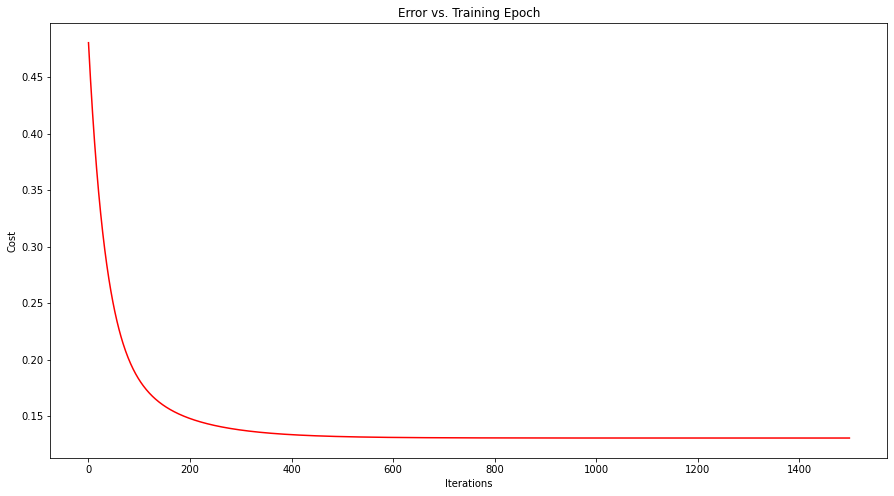

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(np.arange(iters), cost, 'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# Scikit-Learn Implementation

In [11]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
data2.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [13]:
X_1 = data2[['Size','Bedrooms']].values
y_1 = data2['Price'].values.reshape(-1,1)

In [14]:
X_1[0:5],y_1[0:5]

(array([[ 0.13000987, -0.22367519],
        [-0.50418984, -0.22367519],
        [ 0.50247636, -0.22367519],
        [-0.73572306, -1.53776691],
        [ 1.25747602,  1.09041654]]), array([[ 0.47574687],
        [-0.08407444],
        [ 0.22862575],
        [-0.86702453],
        [ 1.59538948]]))

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, train_size=0.7,test_size=0.3, random_state=0)

In [16]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape )

(32, 2) (15, 2) (32, 1) (15, 1)


In [17]:
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [18]:
y_pred = regr.predict(X_test)

In [19]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[ 0.83747992 -0.02781559]]


In [20]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))


Mean squared error: 0.34


In [21]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.61
